In [0]:
import pandas as pd

data = {
    "date": [
        "6/19", "6/19", "6/19", "7/19", "7/19", "7/19", "8/19", "8/19", "8/19",
        "9/19", "9/19", "9/19", "10/19", "10/19", "10/19", "11/19", "11/19", "11/19",
        "12/19", "12/19", "12/19", "1/20", "1/20", "1/20", "2/20", "2/20", "2/20",
        "3/20", "3/20", "3/20", "4/20", "4/20", "4/20", "5/20", "5/20", "5/20"
    ],
    "market": [
        "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA",
        "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA",
        "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA",
        "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA", "USA"
    ],
    "channel": [
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C"
    ],
    "actual_sales": [
        3773, 1779, 18454, 3498, 2057, 16081, 3175, 1594, 12737, 3656, 1395, 18127,
        2883, 1257, 19349, 2833, 1459, 20379, 3794, 2376, 24612, 3700, 1917, 23247,
        3737, 2432, 25708, 3496, 2620, 25983, 3139, 2124, 23965, 2520, 1993, 24566
    ],
    "challenger_forecast": [
        3226, 1787, 20346, 3233, 1991, 21824, 3340, 1428, 11407, 3478, 1621, 14796,
        3479, 1556, 20922, 3146, 1521, 20157, 3319, 2015, 19774, 2421, 1796, 19650,
        3700, 2066, 21250, 3475, 2552, 22762, 3475, 2851, 22180, 3150, 1661, 24566
    ],
    "champion_forecast": [
        3877, 1514, 21124, 4488, 1834, 21142, 3824, 1575, 19448, 3852, 1476, 14943,
        3646, 1451, 18436, 3336, 1446, 19512, 3834, 2173, 22603, 3716, 2024, 22595,
        3332, 2093, 22291, 2720, 2212, 22439, 3176, 2196, 24996, 3221, 1734, 22761
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)



In [0]:
 #Calculate absolute errors and percentage errors
df["challenger_abs_error"] = abs(df["challenger_forecast"] - df["actual_sales"])
df["champion_abs_error"] = abs(df["champion_forecast"] - df["actual_sales"])

df["challenger_pct_error"] = df["challenger_abs_error"] / df["actual_sales"] * 100
df["champion_pct_error"] = df["champion_abs_error"] / df["actual_sales"] * 100

metrics = {
    "MAE": lambda x: x.mean(),
    "MAPE": lambda x: x.mean(),
    "RMSE": lambda x: (x**2).mean()**0.5,
}

summary = pd.DataFrame({
    "challenger": [
        metrics["MAE"](df["challenger_abs_error"]),
        metrics["MAPE"](df["challenger_pct_error"]),
        metrics["RMSE"](df["challenger_abs_error"]),
    ],
    "champion": [
        metrics["MAE"](df["champion_abs_error"]),
        metrics["MAPE"](df["champion_pct_error"]),
        metrics["RMSE"](df["champion_abs_error"]),
    ]
}, index=["MAE", "MAPE", "RMSE"])

print(summary)

       challenger     champion
MAE   1100.944444  1089.638889
MAPE    12.580737    12.455447
RMSE  1871.440785  1875.564945


In [0]:
summary = pd.DataFrame({
    "challenger": [
        metrics["MAE"](df["challenger_abs_error"]),
    ],
    "champion": [
        metrics["MAE"](df["champion_abs_error"]),
    ]
}, index=["MAE"])

In [0]:
display(summary)

challenger,champion
1100.9444444444443,1089.638888888889


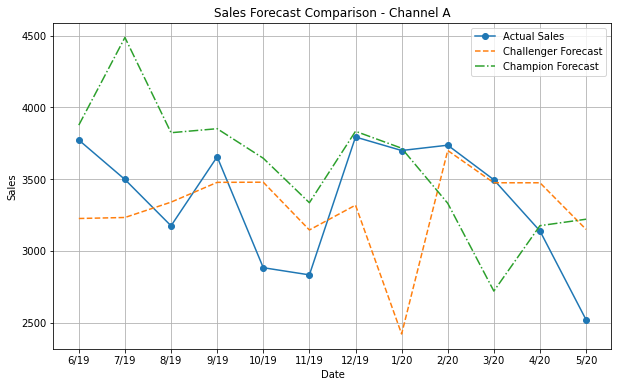

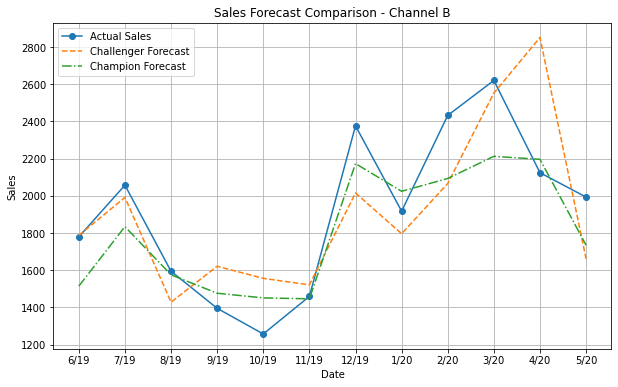

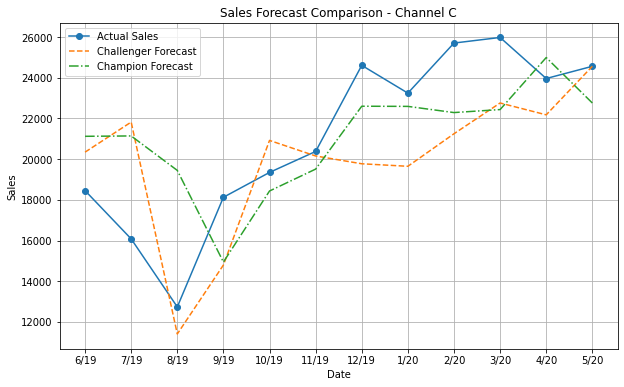

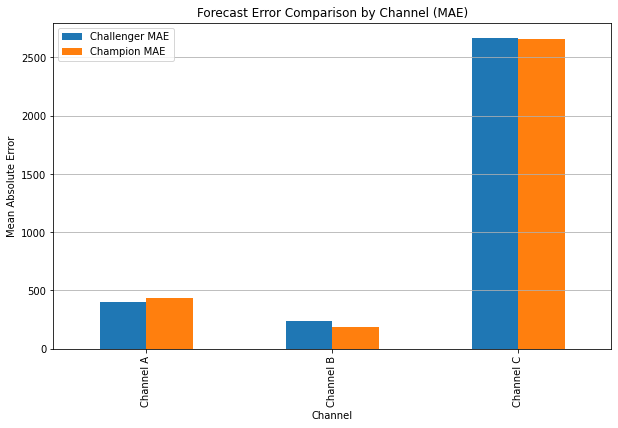

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into Pandas (example assumes you already have df as a Pandas DataFrame)
channels = df["channel"].unique()

# Line Chart for Actual vs Forecasts
for channel in channels:
    subset = df[df["channel"] == channel]
    plt.figure(figsize=(10, 6))
    plt.plot(subset["date"], subset["actual_sales"], label="Actual Sales", marker='o')
    plt.plot(subset["date"], subset["challenger_forecast"], label="Challenger Forecast", linestyle='--')
    plt.plot(subset["date"], subset["champion_forecast"], label="Champion Forecast", linestyle='-.')
    plt.title(f"Sales Forecast Comparison - {channel}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid()
    plt.show()

# Bar Chart for Error Comparison
error_summary = pd.DataFrame({
    "Channel": channels,
    "Challenger MAE": df.groupby("channel")["challenger_abs_error"].mean(),
    "Champion MAE": df.groupby("channel")["champion_abs_error"].mean()
})

error_summary.plot(kind="bar", x="Channel", figsize=(10, 6))
plt.title("Forecast Error Comparison by Channel (MAE)")
plt.ylabel("Mean Absolute Error")
plt.grid(axis='y')
plt.show()


In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql import Row

# Create a Spark session
spark = SparkSession.builder.appName("ForecastComparison").getOrCreate()

# Prepare metrics data
metrics_data = [
    Row(metric="MAE", challenger=1100.94, champion=1089.64),
    Row(metric="MAPE (%)", challenger=12.58, champion=12.46),
    Row(metric="RMSE", challenger=1871.44, champion=1875.56)
]

# Create a Spark DataFrame
metrics_df = spark.createDataFrame(metrics_data)

# Display the data
metrics_df.show()


+--------+----------+--------+
|  metric|challenger|champion|
+--------+----------+--------+
|     MAE|   1100.94| 1089.64|
|MAPE (%)|     12.58|   12.46|
|    RMSE|   1871.44| 1875.56|
+--------+----------+--------+



In [0]:
# Convert Spark DataFrame to Pandas for visualization
metrics_pd = metrics_df.toPandas()
metrics_pd1=metrics_pd.transpose()

# Display the DataFrame
display(metrics_pd1)


/databricks/spark/python/pyspark/sql/pandas/conversion.py:467: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Expected bytes, got a 'float' object
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


0,1,2
MAE,MAPE (%),RMSE
1100.94,12.58,1871.44
1089.64,12.46,1875.56


Databricks data profile. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

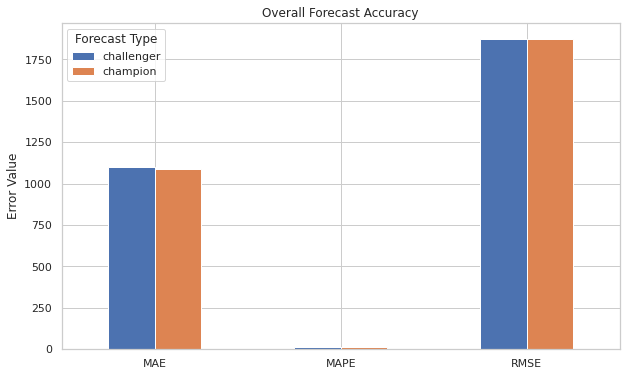

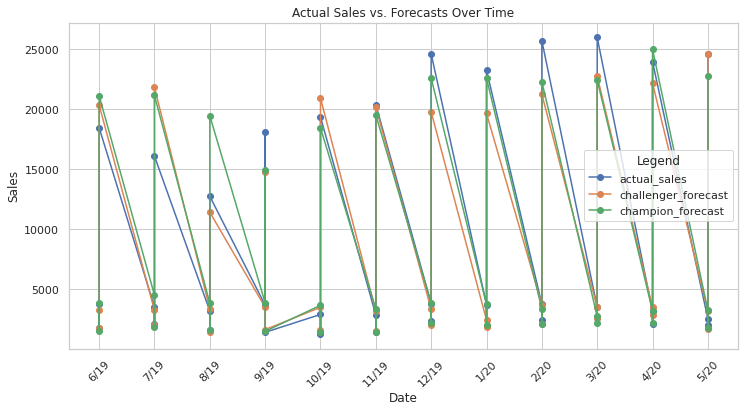

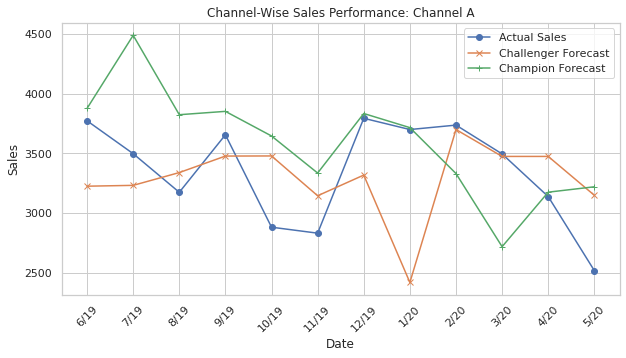

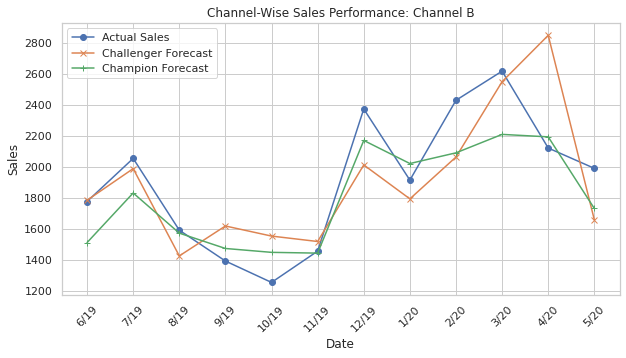

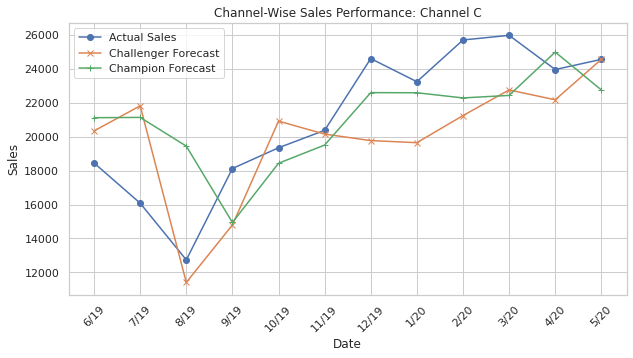

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = {
    "date": [
        "6/19", "6/19", "6/19", "7/19", "7/19", "7/19", "8/19", "8/19", "8/19",
        "9/19", "9/19", "9/19", "10/19", "10/19", "10/19", "11/19", "11/19", "11/19",
        "12/19", "12/19", "12/19", "1/20", "1/20", "1/20", "2/20", "2/20", "2/20",
        "3/20", "3/20", "3/20", "4/20", "4/20", "4/20", "5/20", "5/20", "5/20"
    ],
    "channel": [
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel C", "Channel B",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C",
        "Channel A", "Channel B", "Channel C", "Channel A", "Channel B", "Channel C"
    ],
    "actual_sales": [
        3773, 1779, 18454, 3498, 2057, 16081, 3175, 1594, 12737, 3656, 18127, 1395,
        2883, 1257, 19349, 2833, 1459, 20379, 3794, 2376, 24612, 3700, 1917, 23247,
        3737, 2432, 25708, 3496, 2620, 25983, 3139, 2124, 23965, 2520, 1993, 24566
    ],
    "challenger_forecast": [
        3226, 1787, 20346, 3233, 1991, 21824, 3340, 1428, 11407, 3478, 14796, 1621,
        3479, 1556, 20922, 3146, 1521, 20157, 3319, 2015, 19774, 2421, 1796, 19650,
        3700, 2066, 21250, 3475, 2552, 22762, 3475, 2851, 22180, 3150, 1661, 24566
    ],
    "champion_forecast": [
        3877, 1514, 21124, 4488, 1834, 21142, 3824, 1575, 19448, 3852, 14943, 1476,
        3646, 1451, 18436, 3336, 1446, 19512, 3834, 2173, 22603, 3716, 2024, 22595,
        3332, 2093, 22291, 2720, 2212, 22439, 3176, 2196, 24996, 3221, 1734, 22761
    ]
}

df = pd.DataFrame(data)

# Prepare Data for Metrics Summary
def calculate_metrics(df):
    metrics = {}
    df["challenger_abs_error"] = abs(df["challenger_forecast"] - df["actual_sales"])
    df["champion_abs_error"] = abs(df["champion_forecast"] - df["actual_sales"])

    metrics["MAE"] = {
        "challenger": df["challenger_abs_error"].mean(),
        "champion": df["champion_abs_error"].mean()
    }
    metrics["MAPE"] = {
        "challenger": (df["challenger_abs_error"] / df["actual_sales"]).mean() * 100,
        "champion": (df["champion_abs_error"] / df["actual_sales"]).mean() * 100
    }
    metrics["RMSE"] = {
        "challenger": (df["challenger_abs_error"] ** 2).mean() ** 0.5,
        "champion": (df["champion_abs_error"] ** 2).mean() ** 0.5
    }
    return metrics

metrics = calculate_metrics(df)

# Visualizations
sns.set(style="whitegrid")

# 1. Overall Forecast Accuracy (MAE, MAPE, RMSE)
metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Overall Forecast Accuracy")
plt.ylabel("Error Value")
plt.xticks(rotation=0)
plt.legend(title="Forecast Type")
plt.show()

# 2. Forecast Trends Over Time
plt.figure(figsize=(12, 6))
for forecast in ["actual_sales", "challenger_forecast", "champion_forecast"]:
    plt.plot(df["date"], df[forecast], marker="o", label=forecast)
plt.title("Actual Sales vs. Forecasts Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(title="Legend")
plt.show()

# 3. Channel-Wise Performance
channels = df["channel"].unique()
for channel in channels:
    channel_data = df[df["channel"] == channel]
    plt.figure(figsize=(10, 5))
    plt.plot(channel_data["date"], channel_data["actual_sales"], label="Actual Sales", marker="o")
    plt.plot(channel_data["date"], channel_data["challenger_forecast"], label="Challenger Forecast", marker="x")
    plt.plot(channel_data["date"], channel_data["champion_forecast"], label="Champion Forecast", marker="+")
    plt.title(f"Channel-Wise Sales Performance: {channel}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
